In [1]:
# https://github.com/huggingface/blog/blob/main/blip-2.md

import requests
from PIL import Image
import time
import torch
from transformers import AutoProcessor, Blip2ForConditionalGeneration

In [ ]:
# url = 'https://media.newyorker.com/cartoons/63dc6847be24a6a76d90eb99/master/w_1160,c_limit/230213_a26611_838.jpg'
# image = Image.open(requests.get(url, stream=True).raw).convert('RGB')  
# display(image.resize((596, 437)))

In [ ]:
start_time = time.time()
device = "cuda" if torch.cuda.is_available() else "cpu"
model = Blip2ForConditionalGeneration.from_pretrained("/home/ubuntu/dev/blip2-opt-6.7b-coco", torch_dtype=torch.float16,
                                                      # map_location=device
                                                     )
end_time = time.time()
print('\n\n Time cost: ', end_time - start_time, 's')

In [13]:
processor = AutoProcessor.from_pretrained("/home/ubuntu/dev/blip2-opt-6.7b-coco")

In [ ]:
import time
inputs = processor(image, return_tensors="pt").to(device, torch.float16)

start_time = time.time()
for i in range(4):
    print(1)
    generated_ids = model.generate(**inputs, max_new_tokens=50)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
end_time = time.time()
print('Loading model done! Time cost: ', end_time - start_time, 's')
print(generated_text)

In [ ]:
prompt = "Question: What is the image about? Answer:"

start_time = time.time()
inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)
generated_ids = model.generate(**inputs, min_new_tokens=10, max_new_tokens=50, num_return_sequences=4, do_sample=True)

for i in range (4):
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[i].strip()
    print(generated_text)

end_time = time.time()
print('Time cost: ', end_time - start_time, 's')

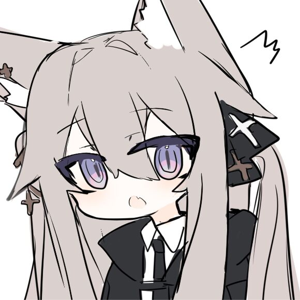

In [9]:
image = Image.open("test.jpg").convert('RGB')  
display(image.resize((300, 300)))

In [ ]:
inputs = processor(image, return_tensors="pt").to(device, torch.float16)
start_time = time.time()

generated_ids = model.generate(**inputs, min_new_tokens=15, max_new_tokens=50, 
                               num_return_sequences=4, do_sample=True, num_beams=10)

for i in range(4):
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[i].strip()
    print(generated_text)
    
end_time = time.time()
print('\n\n Time cost: ', end_time - start_time, 's')

In [ ]:
inputs = processor(image, return_tensors="pt").to(device, torch.float16)
start_time = time.time()

generated_ids = model.generate(**inputs, min_new_tokens=12, max_new_tokens=50, num_return_sequences=4, do_sample=True)

for i in range(4):
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[i].strip()
    print(generated_text)
    
end_time = time.time()
print('\n\n Time cost: ', end_time - start_time, 's')

In [21]:
inputs = processor(image, return_tensors="pt").to(device, torch.float16)
start_time = time.time()

generated_ids = model.generate(**inputs, min_new_tokens=13, max_new_tokens=50, num_return_sequences=4, do_sample=True)

for i in range(4):
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[i].strip()
    print(generated_text)
    
end_time = time.time()
print('\n\n Time cost: ', end_time - start_time, 's')

a drawing of a character in an anime style with blue eyes and black hair in a tie
loli ano hyoran - hyoran-anime.com/animes/hyori-hayami-hyoran-anime/anime-fansites/by-loli-an… hyorin-an
a drawing of a girl with long black hair and pale skin wearing black
an anime drawing with large cat ears and red eyes looking shocked and smiling


 Time cost:  1.68178391456604 s
